In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30)
df = pd.read_csv('hotel_bookings_data.csv')

In [2]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

In [5]:
df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [6]:
columns = [x for x in df.columns]
percent=[]
for kolom in columns:
    percent.append(round(df[kolom].isnull().sum()/df[kolom].shape[0]*100, 2))
    
explore = df.describe(percentiles = [], include = 'all').T 
explore['missing'] = len(df) - explore['count'] 
explore['%'] = percent
explore = explore[['missing','%','min','max']]

explore = explore.replace(np.nan, '-', regex=True)
explore

,missing,%,min,max
hotel,0.0,0.00,-,-
is_canceled,0.0,0.00,0.0,1.0
lead_time,0.0,0.00,0.0,737.0
arrival_date_year,0.0,0.00,2017.0,2019.0
arrival_date_month,0.0,0.00,-,-
arrival_date_week_number,0.0,0.00,1.0,53.0
arrival_date_day_of_month,0.0,0.00,1.0,31.0
stays_in_weekend_nights,0.0,0.00,0.0,19.0
stays_in_weekdays_nights,0.0,0.00,0.0,50.0
adults,0.0,0.00,0.0,55.0


## Univariate Analysis

In [7]:
num_dtypes = ['int32','int64','float64']
cat_dtypes = ['object']

num_df = df.select_dtypes(include=num_dtypes)
cat_df = df.select_dtypes(include=cat_dtypes)

numericals = num_df.columns
categoricals = cat_df.columns

print(numericals)
print(categoricals)

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults',
       'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')
Index(['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment',
       'distribution_channel', 'deposit_type', 'customer_type',
       'reservation_status'],
      dtype='object')


In [8]:
df[numericals].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
df[categoricals].describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


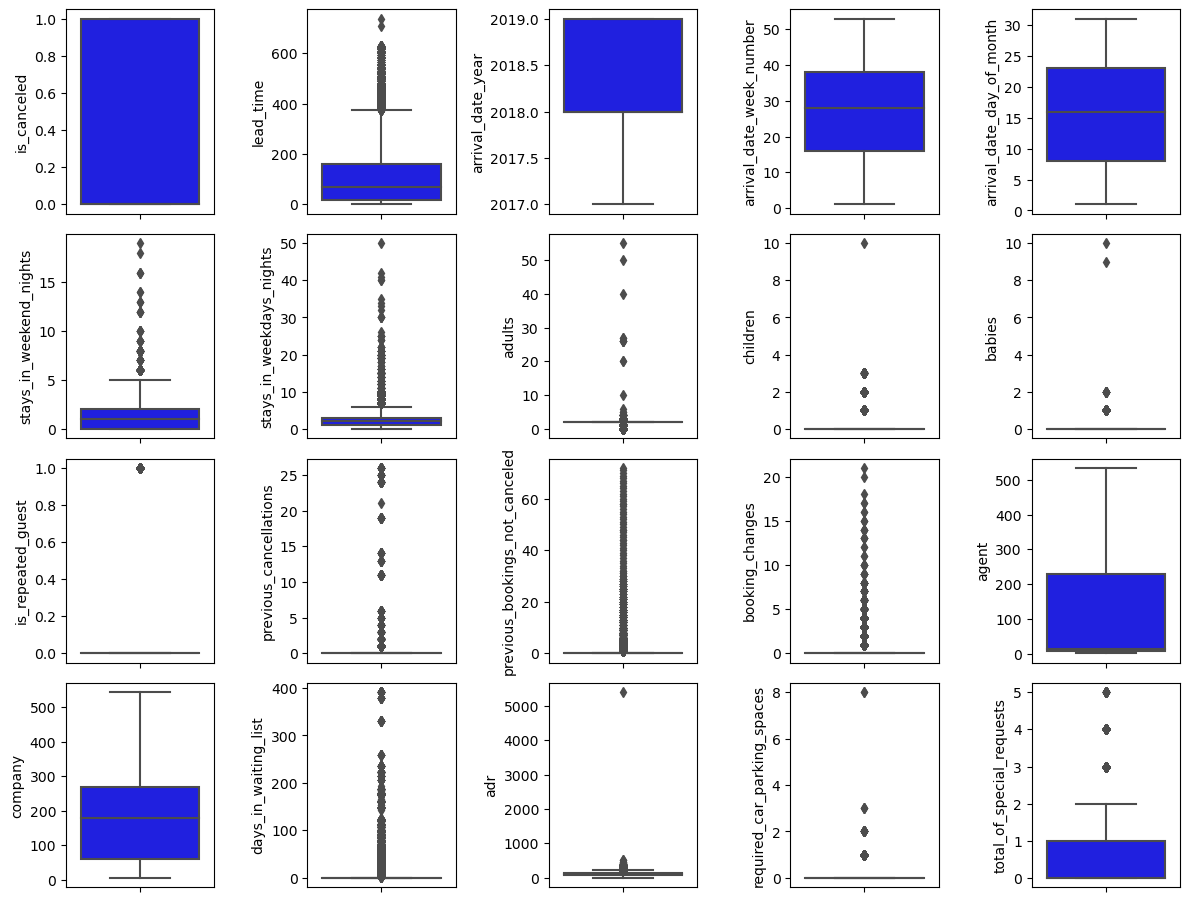

In [10]:
plt.figure(figsize=(12,45))
for i in range(0, len(numericals)):
    plt.subplot(len(numericals), 5,i+1)
    sns.boxplot(y=df[numericals[i]], color='blue', orient='v')
    plt.tight_layout()

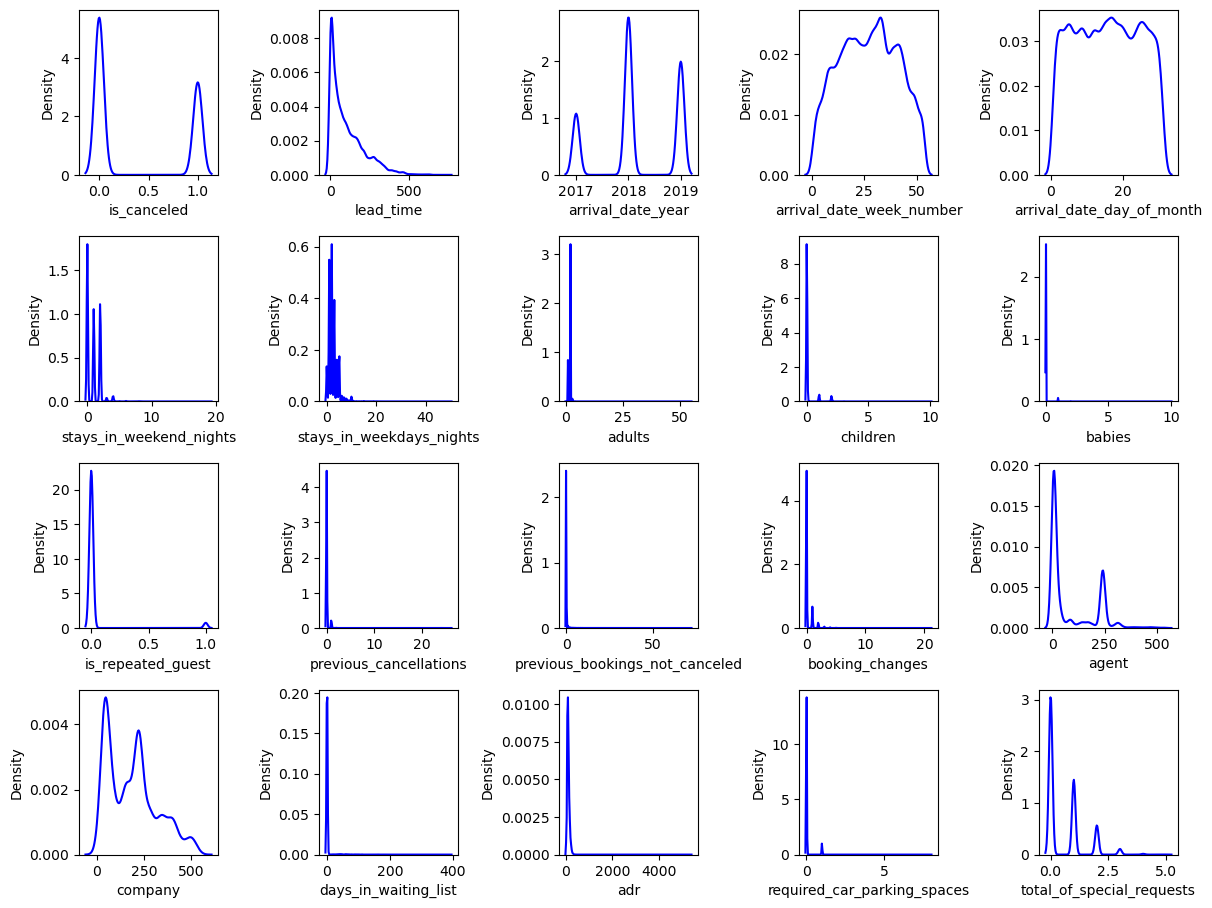

In [11]:
plt.figure(figsize=(12,45))
for i in range(0, len(numericals)):
    plt.subplot(len(numericals), 5,i+1)
    sns.kdeplot(x=df[numericals[i]], color='blue')
    plt.tight_layout()

# Data Preprocessing

# Handling Missing Value

In [43]:
from sklearn.impute import KNNImputer

df_num = df[numericals].copy()
impute_KNN = KNNImputer(n_neighbors=2)

df_num_imputed = pd.DataFrame(impute_KNN.fit_transform(df_num), columns=df_num.columns)

In [44]:
from sklearn.impute import SimpleImputer

df_cats = df[categoricals].copy()
imputer = SimpleImputer(strategy='constant', fill_value='missing')

df_cats_imputed = pd.DataFrame(imputer.fit_transform(df_cats), columns=df_cats.columns)

In [46]:
df_cats_imputed.replace('Undefined','No Meal', inplace=True)

In [47]:
df_new = df_num_imputed.join(df_cats_imputed)
df_new['num_cust'] = df_new.apply(lambda x: x['adults']+x['children']+x['babies'], axis=1)

In [48]:
df_new.drop(columns=['adults','children','babies'], inplace=True)

In [49]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  float64
 1   lead_time                       119390 non-null  float64
 2   arrival_date_year               119390 non-null  float64
 3   arrival_date_week_number        119390 non-null  float64
 4   arrival_date_day_of_month       119390 non-null  float64
 5   stays_in_weekend_nights         119390 non-null  float64
 6   stays_in_weekdays_nights        119390 non-null  float64
 7   is_repeated_guest               119390 non-null  float64
 8   previous_cancellations          119390 non-null  float64
 9   previous_bookings_not_canceled  119390 non-null  float64
 10  booking_changes                 119390 non-null  float64
 11  agent                           119390 non-null  float64
 12  company         

In [52]:
df_new.to_csv(r'C:\Users\Ferdy-Aditya\Documents\GitHub\hotel_booking_analysis\cleaned_dataframe.csv', index=False, header=True)

# Data Visualization

In [55]:
df_new.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status,num_cust
0,0.0,342.0,2017.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,223.0,0.0,0.0,0.0,0.0,Resort Hotel,September,Breakfast,Kota Denpasar,Direct,Direct,No Deposit,Personal,Check-Out,2.0
1,0.0,737.0,2017.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,223.0,0.0,0.0,0.0,0.0,Resort Hotel,September,Breakfast,Kota Denpasar,Direct,Direct,No Deposit,Personal,Check-Out,2.0
2,0.0,7.0,2017.0,27.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,199.5,189.0,0.0,75.0,0.0,0.0,Resort Hotel,September,Breakfast,Kabupaten Bangka,Direct,Direct,No Deposit,Personal,Check-Out,1.0
3,0.0,13.0,2017.0,27.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,304.0,43.5,0.0,75.0,0.0,0.0,Resort Hotel,September,Breakfast,Kabupaten Bangka,Corporate,Corporate,No Deposit,Personal,Check-Out,1.0
4,0.0,14.0,2017.0,27.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,240.0,346.0,0.0,98.0,0.0,1.0,Resort Hotel,September,Breakfast,Kabupaten Bangka,Online TA,TA/TO,No Deposit,Personal,Check-Out,2.0


In [54]:
df_new['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [62]:
hotel_booking_per_month = df_new.groupby(['arrival_date_month', 'hotel']).agg(
    hotel_count=('hotel', 'count')
).reset_index()

hotel_booking_per_month

,arrival_date_month,hotel,hotel_count
0,April,City Hotel,4965
1,April,Resort Hotel,3103
2,August,City Hotel,7894
3,August,Resort Hotel,3045
4,December,City Hotel,7605
5,December,Resort Hotel,3555
6,February,City Hotel,4132
7,February,Resort Hotel,2648
8,January,City Hotel,4357
9,January,Resort Hotel,2437


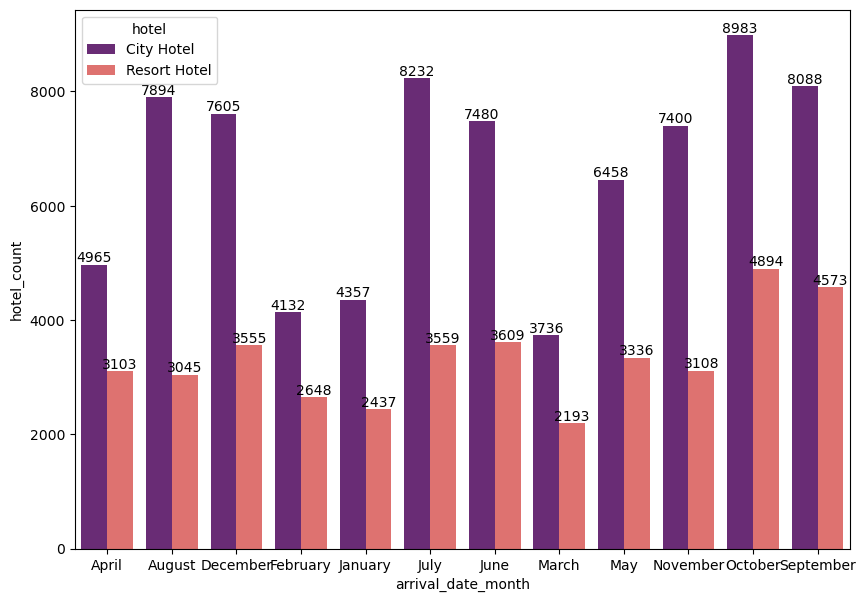

In [70]:
plt.figure(figsize=(10,7))
fig_1 = sns.barplot(data=hotel_booking_per_month, x='arrival_date_month', y='hotel_count', hue='hotel', palette='magma')

for i in range(2):
    fig_1.bar_label(fig_1.containers[i])